# Detect financial fraud using support vector machines (SVM) in Python
------------
This work is part of a collection of practice sets called [Machine Learning Starter](https://github.com/jamiemorales/project-machine-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify whether a mushroom is a poisoned mushroom.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [1]:
# Set-up libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
# Read-in data
df = pd.read_csv('../00-Datasets/mushrooms.csv')

In [4]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
# Look at some records
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Check for missing values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Check for duplicate values
df.duplicated().sum()

0

e    4208
p    3916
Name: class, dtype: int64

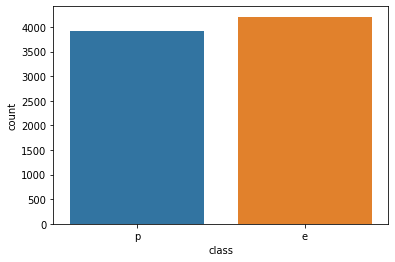

In [8]:
# Look at breakdown of label
sns.countplot(df['class'])
df['class'].value_counts()

In [9]:
# Summarise
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Step 2: Preprocess data and understand some more
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean.

Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [10]:
# Grab some samples
df = df.sample(5000, random_state=0)

In [11]:
# Transform categorical feature(s) to numeric
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5000.000000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,...,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.476400,3.33980,1.839200,4.5616,0.419600,4.116400,0.973200,0.160200,0.304200,4.8098,...,1.613000,5.817600,5.776200,0.0,1.963800,1.068000,2.302200,3.574000,3.645000,1.514200
std,0.499493,1.60588,1.229327,2.5723,0.493543,2.118714,0.161515,0.366828,0.460114,3.5416,...,0.666123,1.891942,1.911137,0.0,0.250803,0.268683,1.797755,2.382364,1.248073,1.720927
min,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,0.000000,3.0000,0.000000,2.000000,1.000000,0.000000,0.000000,2.0000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.00000,2.000000,4.0000,0.000000,5.000000,1.000000,0.000000,0.000000,5.0000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.00000,3.000000,8.0000,1.000000,5.000000,1.000000,0.000000,1.000000,7.0000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.00000,3.000000,9.0000,1.000000,8.000000,1.000000,1.000000,1.000000,11.0000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
# Explore correlation to label
df.corr()['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.533904
population                  0.296371
habitat                     0.219724
cap-surface                 0.174299
spore-print-color           0.172094
veil-color                  0.145675
gill-attachment             0.126055
cap-shape                   0.047532
cap-color                  -0.028605
odor                       -0.084165
stalk-shape                -0.097545
stalk-color-below-ring     -0.152536
stalk-color-above-ring     -0.161199
ring-number                -0.210132
stalk-surface-below-ring   -0.312734
gill-spacing               -0.343462
stalk-surface-above-ring   -0.345155
stalk-root                 -0.382125
ring-type                  -0.419664
bruises                    -0.510799
gill-color                 -0.537918
veil-type                        NaN
Name: class, dtype: float64

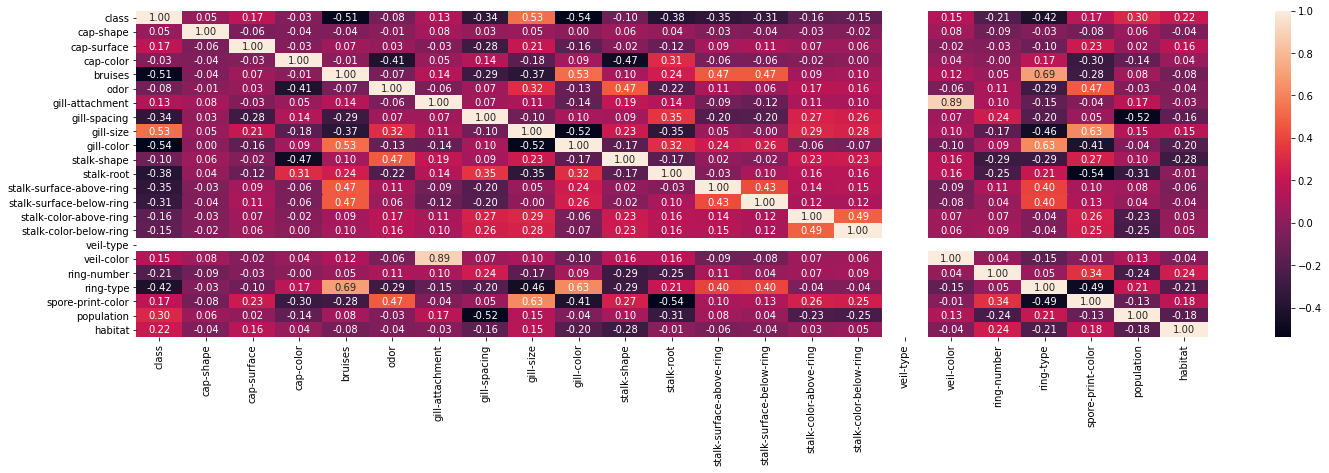

In [13]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(24,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [14]:
# Split dataset into 80% train and 20% validation
X = df.drop('class', axis=1)
y = df['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model and evaluate
This last step is three-fold.

We create the model and fit the model to the data we prepared for training.

We then proceed to classifying with the data we prepared for validation.

Lastly, we evaluate the model's performance with mainstream classification metrics.

In [15]:
# Build model and train
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [17]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                 'Predict': y_predict
                                 })

actual_vs_predict.sample(12)

,Actual,Predict
1709,0,0
2148,0,0
1625,1,1
6748,1,1
7636,0,0
1692,0,0
6115,1,1
6656,1,1
2481,0,0
3862,0,0


In [18]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       512
           1       1.00      0.98      0.99       488

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/